## ECE1513 Tutorial 4 part 1:
### Linear Regression with sklearn and numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Section 1: Generating Synthetic Data


In [2]:
# Generate synthetic regression data with 3 features and some noise for realism
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 3) (20, 3) (80,) (20,)


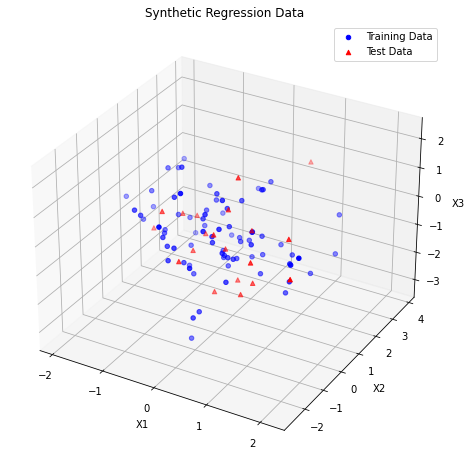

In [3]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='blue', marker='o', label='Training Data')

ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c='red', marker='^', label='Test Data')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Synthetic Regression Data')
ax.legend()

plt.show()

### Section 2: Linear Regression with NumPy

In [4]:
def train_linear_regression(X, y):
    """
    Trains a linear regression model using the normal equation.
    
    Parameters:
        X (np.ndarray): Input features (design matrix).
        y (np.ndarray): Target values.
    
    Returns:
        np.ndarray: Coefficients of the linear regression model.
    """
    # Adding a column of ones for the intercept term: y = b + w1*x1 + w2*x2 + ... + wn*xn
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept term to the input features
    
    # Calculate the coefficients using the normal equation (X^T X)^(-1)X^T y
    return np.linalg.pinv(X_bias.T @ X_bias) @ X_bias.T @ y

# Train a linear regression model using synthetic data
coefficients = train_linear_regression(X_train, y_train)
print("Learned Coefficients:", coefficients)

# Predict on the test set
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])  # Add intercept term
y_pred = X_test_bias @ coefficients  # Make predictions

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Compute mean squared error
print("Mean Squared Error on Test Set:", mse)
print("Target Values:", y_test)
print("Predictions:", y_pred)

Learned Coefficients: [ 1.30375945 28.49475136 74.39534965 18.78132401]
Mean Squared Error on Test Set: 123.84680824798124
Target Values: [  21.85731688    2.79729129  -55.51805276  -24.81108317   44.7425582
  299.2706523    46.21469313  -73.29289474 -122.29489791   12.78127599
   42.29544193   33.69367066  -39.33912134  -70.06843444   16.22512072
  -30.4165569   -52.28763285  -38.97147382  -18.41369652   66.69351173]
Predictions: [   2.09318899    0.89599885  -60.6507773   -21.45525368   50.78554934
  312.2425462    25.6908719   -76.36043905 -117.6418961    14.13488097
   61.04573435   23.12331558  -46.63879976  -49.75328272   25.78976519
  -35.52854174  -35.64242991  -44.53990254  -17.2499538    61.22993414]


### Section 3: Linear Regression with SciKit-Learn

In [5]:
# Train a linear regression model using scikit-learn
lr = LinearRegression()
lr.fit(X_train, y_train)  # Fit the model
y_pred_sklearn = lr.predict(X_test)  # Predict on test set

# Evaluate the scikit-learn model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)  # Compute mean squared error
print("Mean Squared Error (SciKit-Learn) on Test Set:", mse_sklearn)

Mean Squared Error (SciKit-Learn) on Test Set: 123.84680824798072


### Section 4: Comparison and Visualization


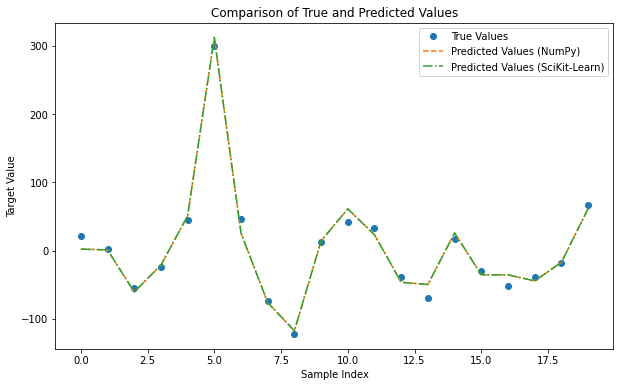

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values', marker='o', linestyle='None')
plt.plot(y_pred, label='Predicted Values (NumPy)', linestyle='--')
plt.plot(y_pred_sklearn, label='Predicted Values (SciKit-Learn)', linestyle='-.')
plt.legend()
plt.title('Comparison of True and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.show()